
# Find N3 leaky modes but with PML


In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from fiberamp.fiber.microstruct.bragg import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


# Initialize Parameters

In [163]:
n_air = 1.00027717
n_glass = 1.4388164768221814
ts = [15*2.7183333333333333e-6, 10e-6, 15*2.7183333333333333e-6,
      10e-6, 30e-6, 30e-6]
rhos =[sum(ts[:i]) for i in range(1, len(ts)+1)]

ns = [lambda x: n_air, lambda x: n_glass, lambda x: n_air,
      lambda x: n_glass, lambda x: n_air, lambda x: n_air]
mats = ['core', 'glass', 'air', 'glass', 'air', 'Outer']
maxhs = [.2, .01, .1, .007, .04, .03]
scale = 15e-6

n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)

# Mode Finding and Viewing

In [164]:
good_wl = wls[200]

bad_wl = wls[162]
A = BraggExact(ts=ts, ns=ns, mats=mats, maxhs=maxhs, scale=scale, wl=bad_wl)


Boundary names not provided, using default names.


In [165]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [12]:
k_low = A.k0 * A.ns[0] * A.scale
k_low

54.683237972603045

## First standard method:

In [60]:
outer = 'h2'
nu = 1

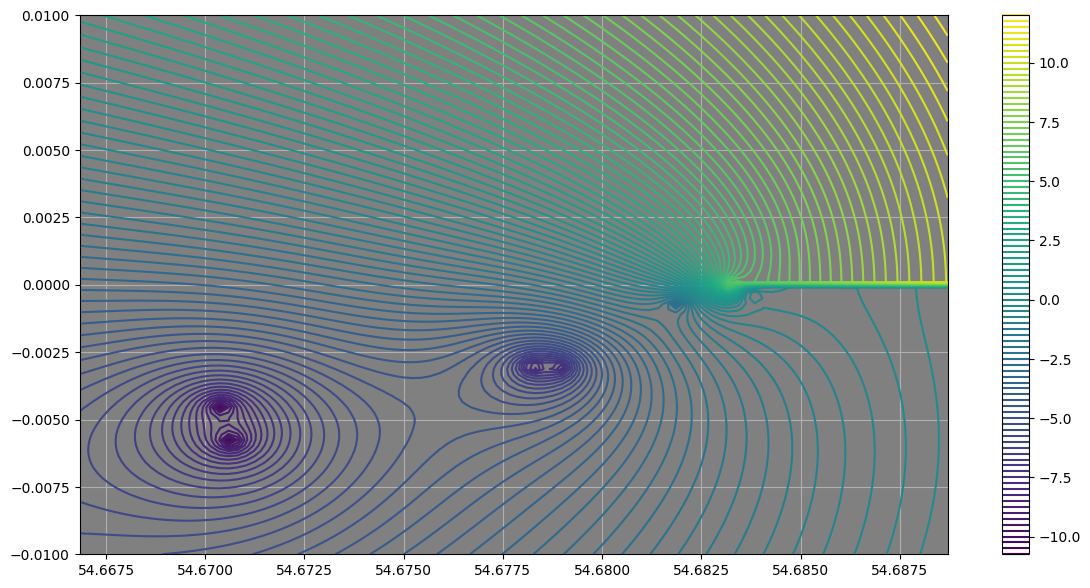

In [61]:
k_low = A.k0 * A.ns[0] * A.scale

plotlogf(A.determinant, .9997*k_low, 1.0001*k_low, -.01,.01, nu, outer,
         iref=100, rref=100, levels=100)

In [15]:
guess = np.array(.99999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (54.681930148848885-0.0006875029374595873j) . Residual of determinant:  8.038874478297065e-12


# Bragg Exact Fields

In [16]:
Fs = A.all_fields(beta1, nu, outer)

## Z-Components

In [148]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [ ]:
Draw(Fs['Ephi'].imag, A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Hphi'].imag, A.mesh)

## Transverse fields

In [24]:
# Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})
Draw(1/2.3e2*Fs['Etv'].Norm(), A.mesh)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

# With PML

In [158]:
outer = 'pcb'
pml = {'alpha':10, 'R0':rhos[-2]}
nu = 1

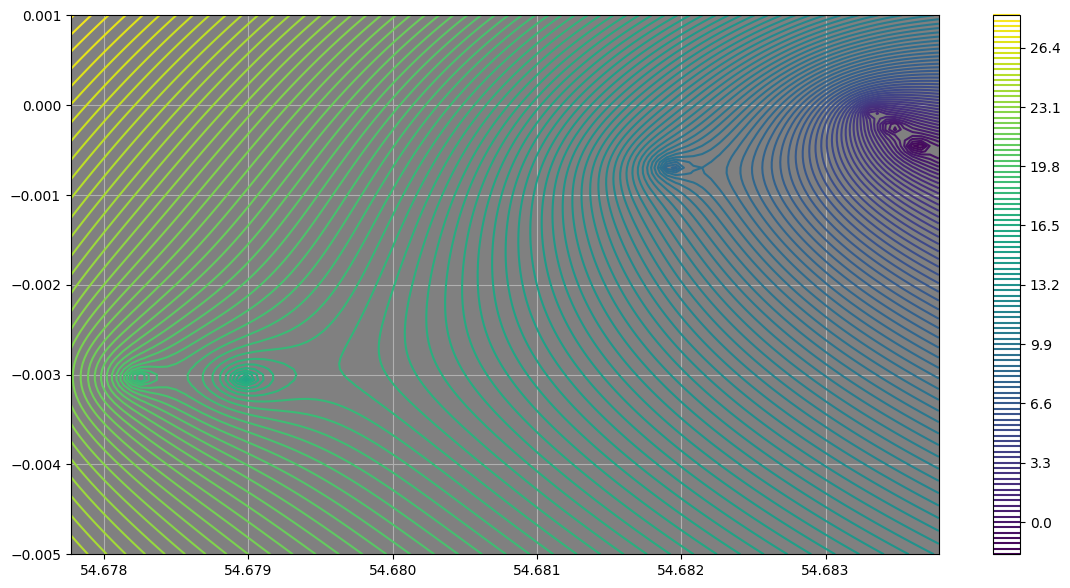

In [135]:
k_low = A.k0 * A.ns[0] * A.scale

plotlogf(A.determinant, .9999*k_low, 1.00001*k_low, -.005,.001, nu, outer, 'kappa', pml,
         iref=100, rref=100, levels=100)

In [136]:
true_fund = 54.681930148848885-0.0006875029374595873j

In [159]:
# guess = np.array(.99999*k_low)
guess = np.array(true_fund)

beta1 = newton(A.determinant, guess, args=(nu, outer, 'kappa', pml), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer, 'kappa', pml)))


Scaled beta:  (54.681930149089084-0.0006875027614160561j) . Residual of determinant:  2.75280806890005e-07


# Bragg Exact Fields

In [160]:
Fs = A.all_fields(beta1, nu, outer, 'kappa', pml)

## Z-Components

In [161]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [33]:
Draw(Fs['Ephi'], A.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

## Transverse fields

In [140]:
# Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})
Draw(Fs['Etv'].Norm() - Fs['Er'].Norm(), A.mesh)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene